In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd

# Parte 1: Velocidade da luz no ar

In [2]:
#Distância medida
delta_x = np.array(np.arange(1,1.65,0.05)) #m

#Incerteza da distância
sigma_x = np.full(len(delta_x), 5e-4) #m

#Intervalo de tempo
delta_t = np.array([7.05, 7.42, 7.74, 8.06, 8.46, 8.74, 9.06, 9.38, 9.78, 10.00, 10.30, 10.70,10.90])*1e-9 #s

#Incerteza do tempo segundo o manual
sigma_t = np.full(len(delta_t), 100e-12)

## Calculando a velocidade e sua incerteza:

A velocidade da luz pode ser calculada utilizando que:

$$c = \frac{\Delta s}{\Delta t}$$

Lembrando que $\Delta s = 2\Delta x$:

$$c = \frac{2\Delta x}{\Delta t}$$

Propagando a incerteza de $\Delta x$ e $\Delta t$:

$$\sigma_{c} = \sqrt{\left(\frac{\partial c}{\partial \Delta x}\right)^2\sigma^2_{\Delta x} + \left(\frac{\partial c}{\partial \Delta t}\right)^2\sigma^2_{\Delta t}}$$

$$\sigma_{c} = \sqrt{\left(\frac{\partial }{\partial \Delta x} \frac{2\Delta x}{\Delta t}\right)^2\sigma^2_{\Delta x} + \left(\frac{\partial }{\partial \Delta t}\frac{2\Delta x}{\Delta t}\right)^2\sigma^2_{\Delta t}}$$

$$\sigma_{c} = \sqrt{\left(\frac{2}{\Delta t}\right)^2\sigma^2_{\Delta x} + \left(\frac{2\Delta x}{\Delta t^2}\right)^2\sigma^2_{\Delta t}}$$

$$\sigma_{c} = \frac{2 \Delta x}{\Delta t}\sqrt{\left(\frac{\sigma_{\Delta x}}{\Delta x}\right)^2 + \left(\frac{\sigma_{\Delta t}}{\Delta t}\right)^2}$$

$$\sigma_{c} = c\sqrt{\left(\frac{\sigma_{\Delta x}}{\Delta x}\right)^2 + \left(\frac{\sigma_{\Delta t}}{\Delta t}\right)^2}$$

In [3]:
#Velocidade da luz
c = 2*delta_x/delta_t

#Incerteza da velocidade
sigma_c = c*np.sqrt((sigma_x/delta_x)**2 + (sigma_t/delta_t)**2)
sigma_c =  [float('{:g}'.format(float('{:.2g}'.format(i)))) for i in sigma_c]

print('c = ',c)
print('sigma_c = ', sigma_c)

c =  [2.83687943e+08 2.83018868e+08 2.84237726e+08 2.85359801e+08
 2.83687943e+08 2.86041190e+08 2.86975717e+08 2.87846482e+08
 2.86298569e+08 2.90000000e+08 2.91262136e+08 2.89719626e+08
 2.93577982e+08]
sigma_c =  [4000000.0, 3800000.0, 3700000.0, 3500000.0, 3400000.0, 3300000.0, 3200000.0, 3100000.0, 2900000.0, 2900000.0, 2800000.0, 2700000.0, 2700000.0]


## Calculando a velocidade média e sua incerteza:


In [4]:
c_mean = np.mean(c)

#Calculando a incerteza propagada:
sigma_c_prop = 0
for s in sigma_c:
    sigma_c_prop += s**2
sigma_c_prop = np.sqrt(sigma_c_prop)/len(sigma_c)
#Arredondando para dois algarismos significativos
sigma_c_prop = float('{:g}'.format(float('{:.2g}'.format(sigma_c_prop))))

#Calculando a incerteza total, a qual conta também com a estatística
sigma_c_mean = np.sqrt(sigma_c_prop**2 + (np.std(c)/np.sqrt(len(c)-1))**2 )
#Arredondando para dois algarismos significativos
sigma_c_mean = float('{:g}'.format(float('{:.2g}'.format(sigma_c_mean))))
#print(c/1e8)

print('c = (%.3f +- %.3f) 10^{8} m/s' % (c_mean/1e8,sigma_c_mean/1e8))

c = (2.871 +- 0.013) 10^{8} m/s


In [5]:
print('desvio =', 1 - c_mean/299792458)

desvio = 0.04248784734208433


## Método gráfico (alternativo)

In [6]:
fit = np.polyfit(delta_t, 2*delta_x,1)

sigma_transf =  np.sqrt(sigma_t**2 + (fit[0]*sigma_t)**2 )
sigma_transf = [float('{:g}'.format(float('{:.2g}'.format(i)))) for i in sigma_transf]
print(sigma_transf)

[0.031, 0.031, 0.031, 0.031, 0.031, 0.031, 0.031, 0.031, 0.031, 0.031, 0.031, 0.031, 0.031]


In [30]:
fitpars, cov_pars = np.polyfit(delta_t,2*delta_x,1,w=np.power(sigma_transf,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.2g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.2g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.3f +- %.3f (m/s)' % (coef_angular/1e8 ,sigma_angular/1e8))
print('Coeficiente linear: %.11f +- %.11f (m)' %(coef_linear/1e8,sigma_linear/1e8))

Coeficiente angular: 3.089 +- 0.035 (m/s)
Coeficiente linear: -0.00000000194 +- 0.00000000032 (m)


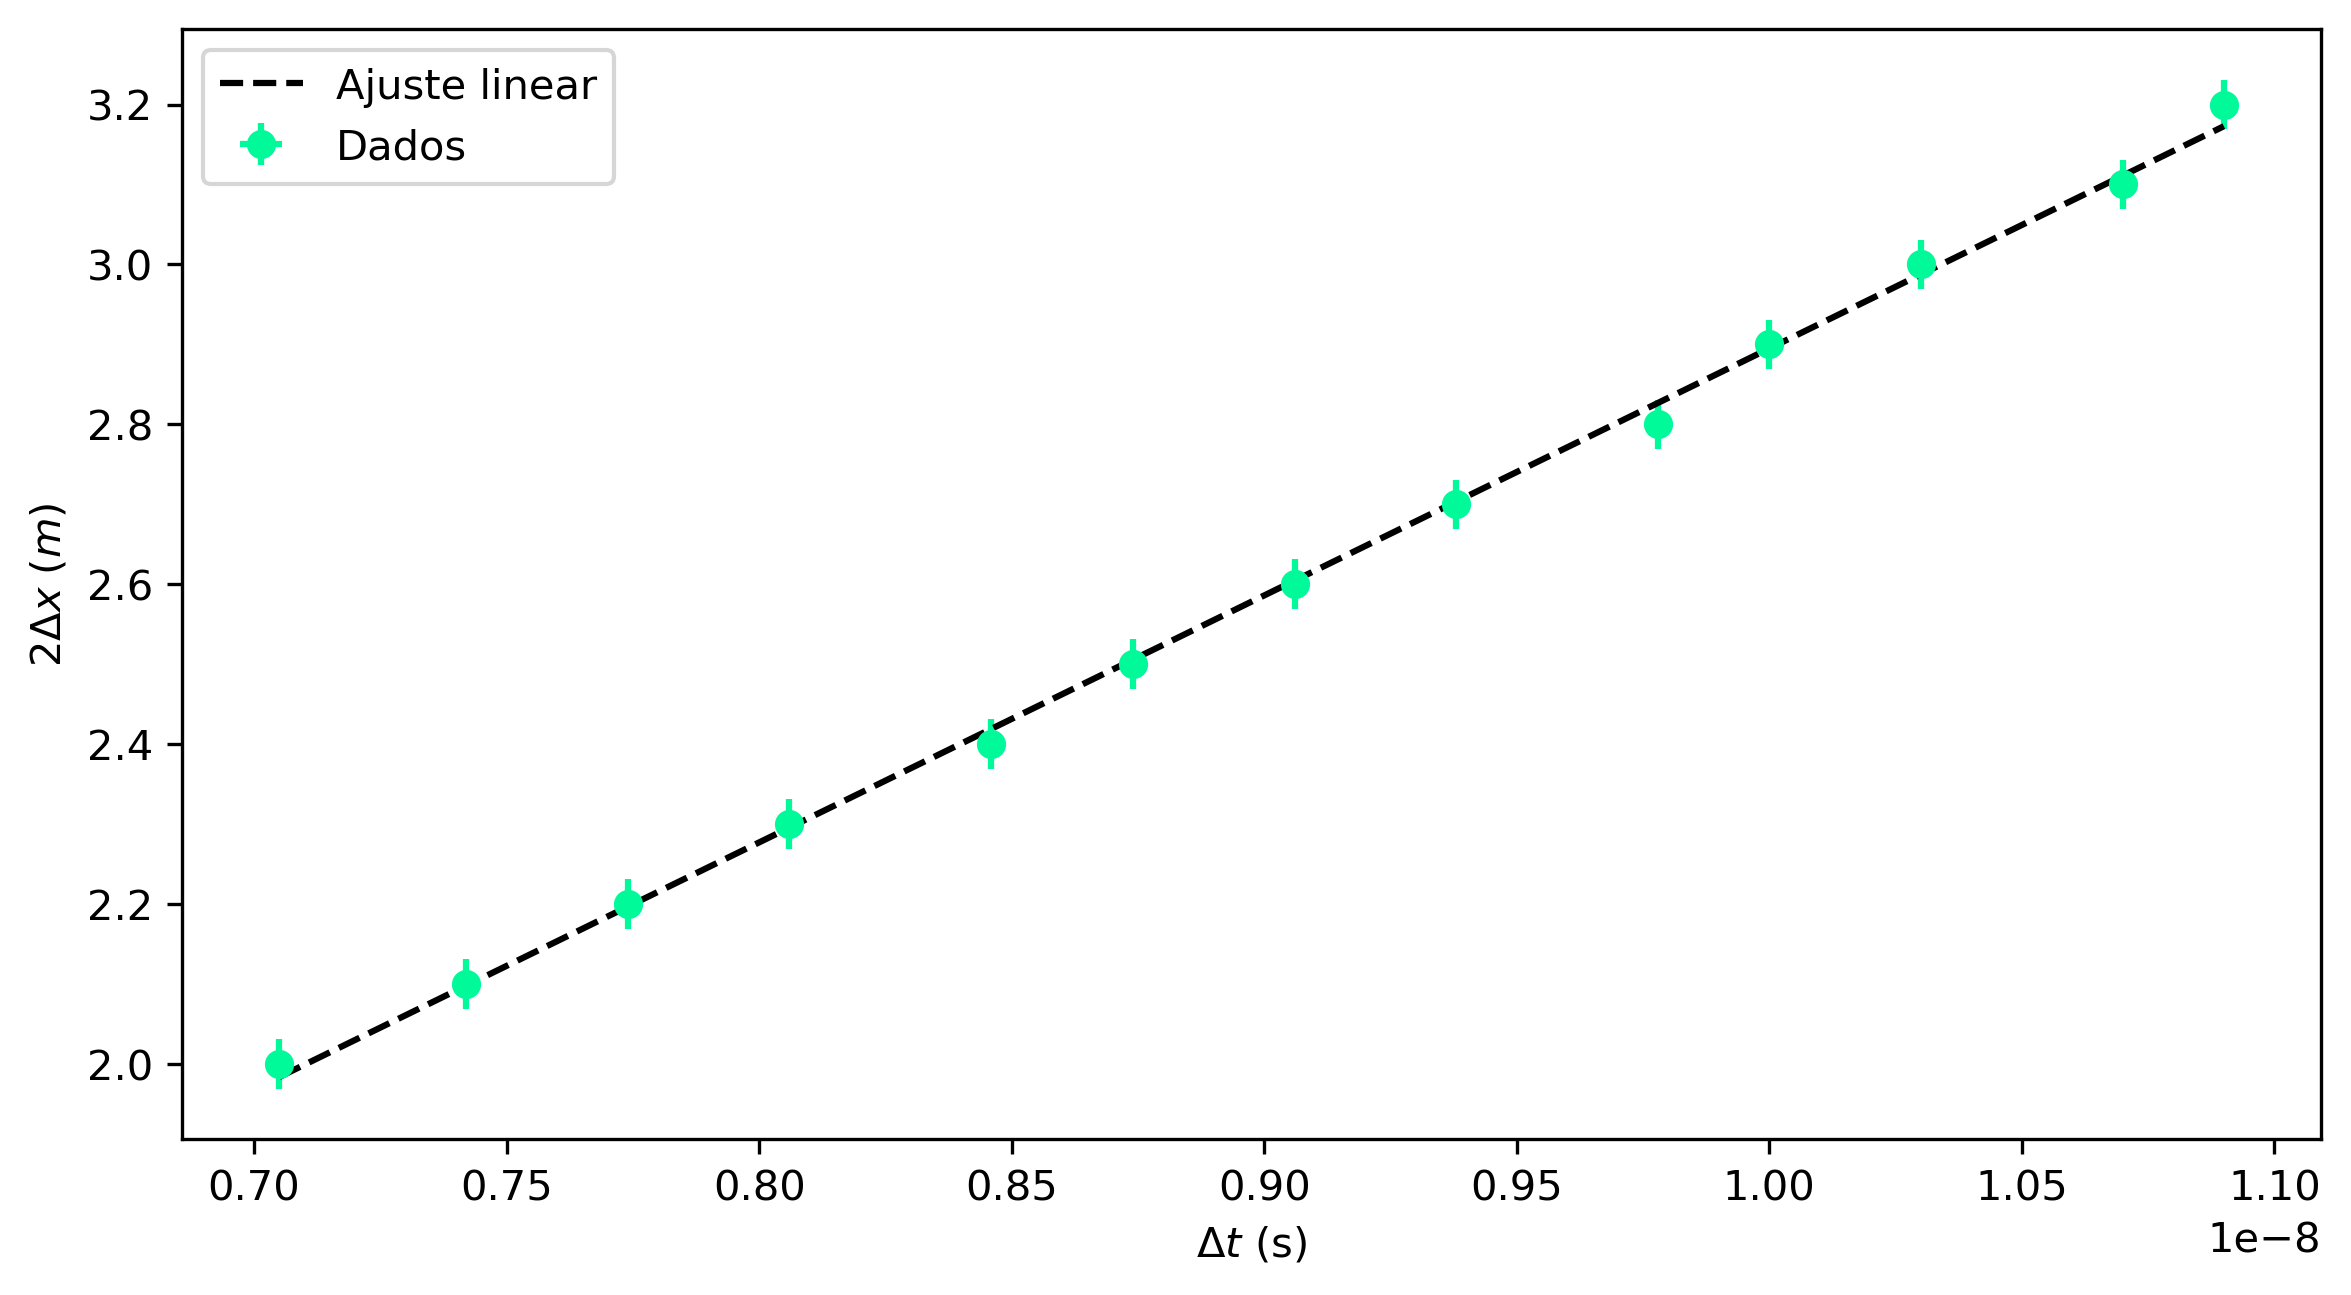

In [8]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(delta_t,2*delta_x,sigma_transf,0, 'o', color = 'Mediumspringgreen', label = 'Dados')
plt.plot(delta_t,delta_t*coef_angular + coef_linear, color ='black', ls = '--', label = r'Ajuste linear')
plt.ylabel('$2\Delta x$ ($m$)')
plt.xlabel('$\Delta t$ (s)')
plt.legend()
plt.show()

# Parte 2: Índice de refração do acrílico



Incerteza do $\Delta x = x_f - x_0$:

$$\sigma_{\Delta x} = \sqrt{\left(\frac{\partial \Delta x}{\partial x_f}\right)^2\sigma^2_{x_f} + \left(\frac{\partial \Delta x}{\partial x_0}\right)^2\sigma^2_{x_0}}$$
$$\sigma_{\Delta x} = \sqrt{\sigma^2_{x_f} + \sigma^2_{x_0}}$$

Como $\sigma_{x_0} = \sigma_{x_f} = \sigma_x$:

$$\sigma_{\Delta x} = \sqrt{\sigma^2_{x} + \sigma^2_{x}}$$

$$\sigma_{\Delta x} = \sigma_x \sqrt{2}$$

In [9]:
x_a0 = np.array([57, 57, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62, 63, 63]) #cm

x_af = np.array([80.5, 80.7, 80.6, 81.8, 81.4, 83.00, 83.8, 83.95, 85.2, 85.1, 87.0, 86.7, 87.4, 87.3]) #cm

delta_x_a = (x_af - x_a0)*1e-2 #m

sigma_delta_x_a = np.array(np.full(len(delta_x_a),np.sqrt(2) * 5e-4)) #m

l_a = np.array(np.full(len(delta_x_a), 490e-3)) #m

## Calculando o índice de refração:

O índice de refração é dado por:

$$n_m = \frac{(\Delta x_m + l_m)}{l_m}$$


Propagando a incerteza de $\Delta x_m$:

$$\sigma_{n_m} = \sqrt{\left(\frac{\partial n_m}{\partial \Delta x_m}\right)^2\sigma_{\Delta x_m}^2}$$

$$\sigma_{n_m} = \sqrt{\left(\frac{\partial }{\partial \Delta x_m} \frac{(\Delta x_m + l_m)}{l_m}\right)^2\sigma_{\Delta x_m}^2}$$

$$\sigma_{n_m} = \sqrt{\left(\frac{1}{l_m}\right)^2\sigma_{\Delta x_m}^2}$$
$$\sigma_{n_m} = \frac{\sigma_{\Delta x_m}}{l_m}$$

In [10]:
n_a = (delta_x_a + l_a)/l_a

sigma_n_a = sigma_delta_x_a/l_a
sigma_n_a = [float('{:g}'.format(float('{:.2g}'.format(i)))) for i in sigma_n_a]

print('n_a = ',n_a)
print('sigma_n_a = ',sigma_n_a)

n_a =  [1.47959184 1.48367347 1.46122449 1.48571429 1.45714286 1.48979592
 1.48571429 1.48877551 1.49387755 1.49183673 1.51020408 1.50408163
 1.49795918 1.49591837]
sigma_n_a =  [0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014]


## Calculando o valor médio do índice de refração:



In [28]:
n_a_mean = np.mean(n_a)


#Calculando a incerteza propagada:
sigma_n_a_mean = 0
for s in sigma_n_a:
    sigma_n_a_mean += s**2
sigma_n_a_mean = np.sqrt(sigma_n_a_mean)/len(sigma_n_a)
#Arredondando para dois algarismos significativos
sigma_n_a_mean = float('{:g}'.format(float('{:.2g}'.format(sigma_n_a_mean))))

#Juntando com a estatística
sigma_n_a_mean = np.sqrt(sigma_n_a_mean**2 + (np.std(n_a)/(len(n_a)-1))**2)
sigma_n_a_mean = float('{:g}'.format(float('{:.2g}'.format(sigma_n_a_mean))))

print('n_a = (%.4f +- %.4f)' % (n_a_mean, sigma_n_a_mean))

n_a = (1.4875 +- 0.0011)


In [12]:
print('desvio = ',1 - n_a_mean/1.49)

desvio =  0.0016533938599410103


# Parte 3: Índice de refração da água

In [17]:
#Dados coletados

x_w0 = np.array([59, 59, 60, 60, 61, 61, 62, 62, 63, 63, 64, 64, 65, 65, 66, 66])

x_wf = np.array([72.8, 74.8, 74.8, 75.85, 79.8, 76.3, 76.7, 77.7, 78.2, 78.5, 79, 79.9, 80.5, 81.0, 82.3, 82.0])


delta_x_w = (x_wf - x_w0)*1e-2 #m

sigma_delta_x_w = np.array(np.full(len(delta_x_w),np.sqrt(2) * 5e-4)) #m

l_w = np.array(np.full(len(delta_x_w), 500e-3)) #m

## Calculando o índice de refração

In [18]:
n_w = (delta_x_w + l_w)/l_w

sigma_n_w = sigma_delta_x_w/l_w
sigma_n_w = [float('{:g}'.format(float('{:.2g}'.format(i)))) for i in sigma_n_w]

print('n_w = ',n_w)
print('sigma_n_w = ',sigma_n_w)

n_w =  [1.276 1.316 1.296 1.317 1.376 1.306 1.294 1.314 1.304 1.31  1.3   1.318
 1.31  1.32  1.326 1.32 ]
sigma_n_w =  [0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014]


## Calculando o valor médio do índice de refração

In [26]:
n_w_mean = np.mean(n_w)


#Calculando a incerteza propagada:
sigma_n_w_mean = 0
for s in sigma_n_w:
    sigma_n_w_mean += s**2
sigma_n_w_mean = np.sqrt(sigma_n_w_mean)/len(sigma_n_w)
#Arredondando para dois algarismos significativos
sigma_n_w_mean = float('{:g}'.format(float('{:.2g}'.format(sigma_n_w_mean))))

#Juntando com a estatística
sigma_n_w_mean = np.sqrt(sigma_n_w_mean**2 + (np.std(n_w)/(len(n_w)-1))**2)
sigma_n_w_mean = float('{:g}'.format(float('{:.2g}'.format(sigma_n_w_mean))))

print('n_a = (%.4f +- %.4f)' % (n_w_mean, sigma_n_w_mean))

n_a = (1.3127 +- 0.0014)


In [24]:
print('desvio = ', 1 - n_w_mean/1.33)

desvio =  0.013016917293233177
